# 이동평균선

https://wikidocs.net/4374

https://namu.wiki/w/이동평균선

http://www.hankookilbo.com/News/Read/201508182147565668

http://ecodemy.cafe24.com/ave.html

In [2]:
from jupyterthemes import jtplot
jtplot.style('grade3')

In [3]:
import pandas_datareader.data as web
from datetime import datetime

f = web.DataReader('AAPL', 'robinhood')

f.head()

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-11-16  168.569200  169.327900         False  167.781100   
       2017-11-17  167.633300  168.855000         False  167.130800   
       2017-11-20  167.465800  168.037200         False  167.052000   
       2017-11-21  170.579100  171.130800         False  168.254000   
       2017-11-22  172.372100  172.411600         False  170.490400   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-11-16  168.648100     reg  23637484  
       2017-11-17  168.510100     reg  21899544  
       2017-11-20  167.771200     reg  16262447  
       2017-11-21  168.254000     reg  25131295  
       2017-11-22  170.795800     reg  25588925

In [4]:
data = f.iloc[-60:] # 최근 60일의 데이터 사용

In [5]:
index = [i[1] for i in data.index.values]
index = [str(i)[:-9] for i in index]

In [6]:
print("Period from ", index[0], " To ", index[-1])

Period from  2018-08-23  To  2018-11-15


### Matplotlib.finance 삭제됨... 사용법

https://stackoverflow.com/questions/42373104/since-matplotlib-finance-has-been-deprecated-how-can-i-use-the-new-mpl-finance

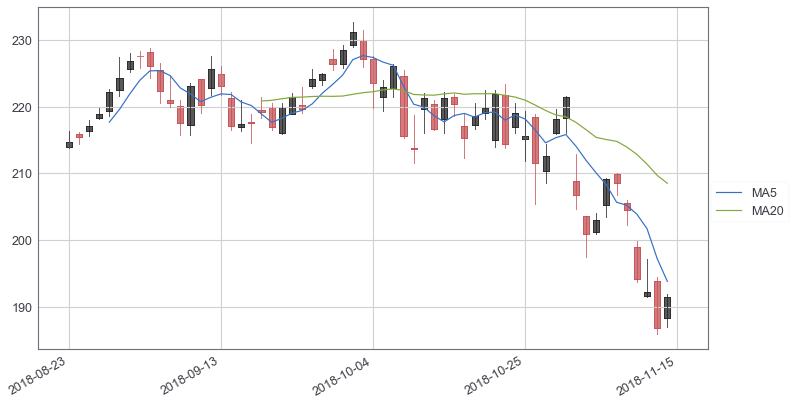

In [8]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np

fig, ax = plt.subplots(figsize=(12,7))
ma5 = data['close_price'].rolling(window=5).mean()
ax.plot(index, ma5, label='MA5')

ma20 = data['close_price'].rolling(window=20).mean()
ax.plot(index, ma20, label='MA20')

candlestick2_ohlc(ax,data['open_price'],data['high_price'],data['low_price'],data['close_price'],width=0.6)

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

def mydate(x,pos):
    try:
        return index[int(x-0.5)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))


fig.legend(loc=5)
fig.autofmt_xdate()
# fig.tight_layout()
plt.show()